# INFO 250: Data Visualization
____

### Project 2A -  Stephanie Bankes
___

### Dataset: Suicide Rates Overview 1985 to 2016 
---


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

#### 1. Identify a dataset for your final project.
For this project, I will be using the dataset, "Suicide Rates Overview 1985 to 2016", that was posted on Kaggle. The link to the dataset is [here](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/version/1). The first five lines of the dataset are shown below. 

___

In [6]:
# Imports the dataset
df = pd.read_csv("master.csv")

In [8]:
# show the first 5 lines
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### 2. Describe the dataset: 
##### a.  What it is about
Suicide is the 10th leading cause of death in the United States, and there were approximately 1,400,000 suicide attempts in  2017 ([afsp](https://afsp.org/about-suicide/suicide-statistics/)). Understanding the trends behind deaths by suicide, and the main groups of people affected can help prevent future suicides and save lives. 

This dataset describes suicide rates grouped by country, year and age population, and sex. So, for each country there is a row for each unique combination of year, population and sex. 
    
I do not have information about how the datasets were combined, but I assume that the first, third, and fourth datasets were used to form rows such as number of suicides, country and age, while the second dataset was used to add inofrmation such as gdp and econimic information about each country. Overall, the dataet has 27820 rows and 12 columns, which represent a total of 6,748,420 people who died by suicide from 1985 to 2015. The columns in the dataset are: 

    country - Counrty in  which suicides occured
    year - Year which suicides occured  
    sex - Gender of people who died by suicide
    age _ age grouping of people who died by suicide, contains 6 different groups
    suicides_no - Number of people who died by suicide wihtin the conditions of the row 
    population - Population of the Country
    suicides/100k pop -  Number of suicides per 100K people in the country
    country-year - A combined string of country and year, to be deleted 
    HDI for year - Human development Index for that country in that year; HDI is a value used to rate the development of a country based on factors such as life expectancy, per-capita income, and education.
    gdp_for_year (USD)  -  gdp (total monetary value of all goods and services produced) per year in the selected country
    gdp_per_capita (USD) - gdp (total monetary value of all goods and services produced) per person in the selected country
    generation - a string representing the generation that the people who died by suicide belonged in 

In [10]:
# Number of rows and columns in the dataset
df.shape

(27820, 12)

In [11]:
# Total number of suicides represented in the dataset. 
sum(df.suicides_no)

6748420

In [22]:
# Name of all the columns in the dataset
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

##### b. Other information about the dataset a designer should know
I obtained this dataset from Kaggle, where it was posted by user "Rusty". Rusty combined data from multiple sources to form this dataset. The dataset that were used to form this dataset are: 
    
    1. United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506  
    2. World Bank. (2018). World development indicators: GDP (current US) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators# 
    3. [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook
    4. World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/ 
    
The data set begins in the year 1985, and ends in 2015. The designer should be aware that each row does not represent a suicide, but rather reresents group of suicides. So this means that in order to get information about the number of suicides in a certain condition, one must total the suicide_no column.

I have changed the names of some of the rows slightly, so that they are easier to read, and do not contain special characters or spaces. I have also deleted country-year, and HDI for year. Country-year does not provide any insight for us. The majority (19456) of HDI for year is missing values. The rest of the columns do not have any missing values. 

While there is no missing valaues, the designer should be aware that not every Country is represetned equally, as shown by the value counts below. This means that not every year (or gener or age group)  for each country is represented. For example, Mongolia is only rreprented by 10 rows of data. The designer should be aware of this, and how it can become misleading. 


In [71]:
df.country.value_counts()

Netherlands               382
Austria                   382
Mauritius                 382
Iceland                   382
Israel                    372
United Kingdom            372
Republic of Korea         372
Japan                     372
United States             372
Argentina                 372
Mexico                    372
Puerto Rico               372
Singapore                 372
Malta                     372
Colombia                  372
Ecuador                   372
Chile                     372
Luxembourg                372
Brazil                    372
Spain                     372
Greece                    372
Italy                     372
Belgium                   372
Norway                    360
France                    360
Guatemala                 360
Ireland                   360
Bulgaria                  360
Australia                 360
Costa Rica                360
                         ... 
Bahrain                   252
Estonia                   252
Switzerlan

In [34]:
# Rename the columns names
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100K', 'country-year', 'HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']

In [35]:
# Number of missing values in each columns 
df.isna().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_per_100K        0
country-year             0
HDI_for_year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

In [53]:
# Drop unneeded rows
df.drop("HDI_for_year", axis = 1, inplace = True)
df.drop("country-year", axis = 1, inplace = True)

##### c. Statistical descriptions of the variables
The following section contains satistical infromation of the features that I beilve will be the most helpful to my dataset. I have not included some features that I believe were repetitive or not helpful. 

Country - The list of countires that are represented in the dataset is shown below.

In [72]:
# List of unique countries
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Year - Every year from 1985 to 2016 is represented in the dataset. However, the years are not all uniformly reprented. This indicates that there is some missing data. When creating visualizations, I must be careful not to be misleading. Most e values are similar, however the "end" ranges of the dataset are missing some. So the data may not have collected all of 2016 and 1985.  The below chart shows the counts of each year in the datset. 

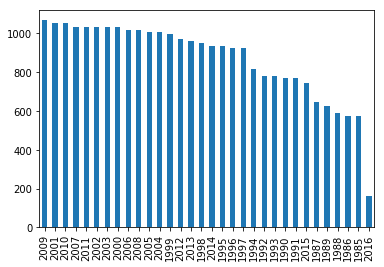

In [74]:
df.year.value_counts(sort = True).plot.bar()

Age - Age is a categorical variable. Each age group is represented in every country, so it is uniformly distributed. The chart below shows the distibution. 

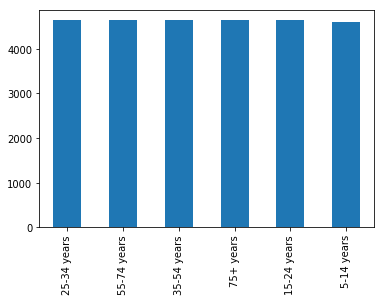

In [75]:
df.age.value_counts(sort = True).plot.bar()

Sex- Sex is uniformaly distibuted, because each combination of country, and age. Sex only has two values. The distribution is below. 

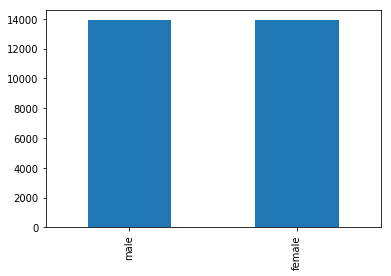

In [76]:
df.sex.value_counts(sort = True).plot.bar()

suicides_no - This is the most important feature in this dataset. The maximum value is 22338, while the minimum value is 0. The mean is 242.574, while the standard devition is 242.574. Overall the range for the dataset is high, and it is not very evenly distrbuted. The plot below shows the distribtuion of suicides_no split into bins 10 bins. We can see the majority of the data is in the lower values of the dataset.  

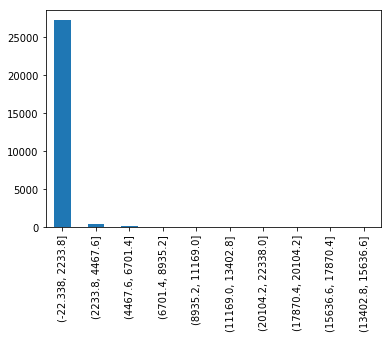

In [86]:
pd.cut(df.suicides_no, 10 ).value_counts(sort = True).plot.bar()

Population - Population follows a similar trend to suicide rates. The mean population is 1844793, while the standard deviation is 3911779. The max population is 43805214 and the min is 278. The plot belows shows the distribution of population cut into 10 bins. 

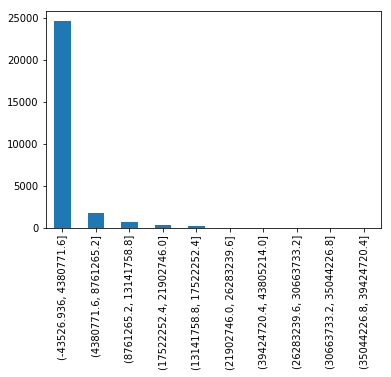

In [87]:
pd.cut(df.population, 10 ).value_counts(sort = True).plot.bar()

gdp_per_year - Has a large range and variation, as shown in the distribtion below. The max value is 18120714000000 and the min value is 46919625. The mean of the dataframe is 445580969025, while the standard deviation is 1453609985940. The distribtion of  gdp_per_year cut into 20 bins is shown below. 

In [98]:
# Converts gdp_per_year to interger
df.gdp_for_year = df.gdp_for_year.str.replace(',', '')

In [103]:
# Converts gdp_per_year to interger
df.gdp_for_year = pd.to_numeric(df.gdp_for_year)

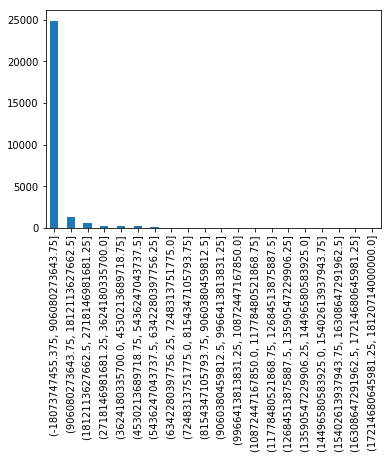

In [106]:
pd.cut(df.gdp_for_year, 20 ).value_counts(sort = False).plot.bar()

Generation - The distribution for generation should be uniform, because each genration should be represented the same number of times. However, from the plot below we can see that some of the generations are not evenly distributed.  

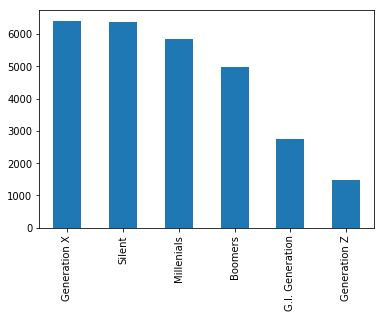

In [113]:
df.generation.value_counts(sort = True).plot.bar()

In [55]:
# Mean of all of the numeric values
df.mean(numeric_only = True)

year                 2.001258e+03
suicides_no          2.425744e+02
population           1.844794e+06
suicides_per_100K    1.281610e+01
gdp_per_capita       1.686646e+04
dtype: float64

In [56]:
# Standard deviation of all of the numeric values
df.std(numeric_only = True)

year                 8.469055e+00
suicides_no          9.020479e+02
population           3.911779e+06
suicides_per_100K    1.896151e+01
gdp_per_capita       1.888758e+04
dtype: float64

___

##### 3. Identify the target audience for your work 
While this work could be helpful for the general public, it should be targeted toward public health and saftey experts. Public health and saftey works may include works for local public health agencies, the CDC, or local suicide prevention groups. These are people in postions of being able to help prevent suicide. Informing these people of thier target audience will help them target people in the most efficent way possible. 

This work can help inform policies and inutives that are working toward suicide prevention. The data will help show trends that describe which members of society, and countries in general are at greater risk of suicide. If workers know which countires, age groups, and sex to target, they can make teir marketing techniques match. 

Public health experts probable already know a great deal about suicides, and have a lot of background knowledge. While they may have some idea of trends, my analyis will give a deeper dive into the knowledge, and they will be able to more easily digest the information in a visual form.  
___

##### 4. Identify the questions that the audience might be curious about your data/visualization.
The audience will be most curious about the groups at most risk to suicide. They will information such as the regions with the highest suicides rates, and which gender and age groups are at most risk. They will be most interested in the relationship between factors. 
    Q1. Which region has the highest suicide rates? 
    Q2. Is there a relationship between suicide rate and gender or age? 
___

##### 5. Design (but not implement) how your visualization will look like.
##### a.  What format of visualization you are going to use?
    I will use a dashboard, and collection of visual aids to format my visualizations. 
##### b. Where do you plan to publish it?
    I plan to publish my work to tableau public server. 
##### c. What tool(s) are you going to use for the visualization?
    I am going to use python to manipulate the data, and Tableau to create my visualzations and dashboard. 
##### d.  What graph type(s) are you going to use?
    The main (biggest) visualization that I create will be a map, showing the total number suicides per 100K by region. It will be similar to the earthquake data that we reviewed in class.
    The next visualization will be a series of scatterplots that show the relationship between total number of suicides and gender and age. I beilve these are most important so that public saftey professionals can 
##### e. What data variables are you going to use?
    I will use country, gdp_per_year, and susicide_no forthe map visualization. 
    I will use gender, no_suicide and age for the scatterplots. 
##### f. How are you going to map the data variables to the visual patterns?
    For the map I will use size to represent the total number suicides that occur. I will then use color to show the distibution. I will use a second visual pattern, color, to show the average gdp_per_year for the region. 
       For the scatterplot, both axis will act as visual patterns, and if it is not overwhelming to the graph, I can add a third pattern of size. 


___